In [ ]:
! pip install --upgrade matplotlib

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

# Question

What are the most important factors for determining the acceptance rate of a college/university?

# Data Collection

In [3]:
link = "https://money.com/best-colleges/"
page = requests.get(link)

In [ ]:
soup = bs(page.content, 'html.parser')

In [ ]:
def func(element):
    return element.string

In [ ]:
data = defaultdict(list)

In [ ]:
data["college_names"] = list(map(func, soup.select('hgroup h2')))
data["college_location"] = list(map(func, soup.select('hgroup h3')))
data["overall_score"] = list(map(func, soup.select('.college-row .col-2')))
data["acceptance_rate"] = list(map(func, soup.select('.college-row .col-3')))
data["Est_full_price_22_23"] = list(map(func, soup.select('.college-row .col-4')))
data["Est_price_with_avg_grant"] = list(map(func, soup.select('.college-row .col-5')))
data["percent_of_student_who_get_grants"] = list(map(func, soup.select('.college-row .col-6')))
data["graduation_rate"] = list(map(func, soup.select('.college-row .col-7')))
data["early_career_earnings"] = list(map(func, soup.select('.college-row .col-8')))

In [ ]:
base_url = "https://money.com"
college_links = soup.select('th a')
for item in college_links:
    href = item['href']
    goto_link = base_url + href
    temp_page = requests.get(goto_link)
    temp_soup = bs(temp_page.content, 'html.parser')
    info_lst = temp_soup.select('dd')[1:]

    data["avg_price_for_low_income_students"].append(info_lst[3].string) 
    data["median_sat_act_score"].append(info_lst[5].string)
    data["sat_act_required"].append(info_lst[6].string)
    data["undergrad_enrollment"].append(info_lst[7].string)
    data["percent_of_students_with_need_who_get_grants"].append(info_lst[8].string) 
    data["percent_of_need_met"].append(info_lst[9].string)
    data["percent_of_students_who_get_merit_grants"].append(info_lst[10].string) 
    data["avg_merit_grant"].append(info_lst[11].string) 
    data["avg_time_to_a_degree"].append(info_lst[13].string) 
    data["median_student_debt"].append(info_lst[14].string) 
    data["percent_earning_more_than_a_high_school_grad"].append(info_lst[16].string) 


In [ ]:
college_df = pd.DataFrame(data=data)

In [ ]:
college_df.head()

,college_names,college_location,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,median_sat_act_score,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree,median_student_debt,percent_earning_more_than_a_high_school_grad
0,University of Michigan,"Ann Arbor, MI",\n 89.41\n,\n 23%\n,"\n $32,400\n","\n $18,800\n",\n 53%\n,\n 92%\n,"\n $75,840\n","$2,670",1440/33,No,"31,050",81%,92%,11%,"$5,670",4.2 years,"$18,526",81%
1,University of North Carolina at Chapel Hill,"Chapel Hill, NC",\n 86.22\n,\n 23%\n,"\n $25,200\n","\n $10,600\n",\n 53%\n,\n 89%\n,"\n $61,920\n","$3,750",1410/31,No,"19,010",90%,100%,5%,"$7,030",4.1 years,"$14,500",78%
2,University of Virginia,"Charlottesville, VA",\n 86.11\n,\n 24%\n,"\n $36,700\n","\n $20,100\n",\n 48%\n,\n 94%\n,"\n $77,050\n","$12,480",1430/32,No,"16,720",91%,100%,4%,"$5,630",4.1 years,"$18,250",84%
3,Massachusetts Maritime Academy,"Buzzards Bay, MA",\n 86.07\n,\n 91%\n,"\n $31,600\n","\n $18,600\n",\n 43%\n,\n 73%\n,"\n $91,670\n","$6,380",1100/22,No,"1,650",56%,71%,11%,"$5,530",4.2 years,"$26,000",91%
4,Virginia Military Institute,"Lexington, VA",\n 85.14\n,\n 60%\n,"\n $33,300\n","\n $20,000\n",\n 85%\n,\n 78%\n,"\n $71,910\n","$10,560",1180/25,No,"1,700",77%,88%,14%,"$13,100",4.1 years,"$21,500",85%


In [ ]:
college_df.to_csv("colleges_dataset_not_cleaned.csv")

# Data Cleaning

In [ ]:
college_df = pd.read_csv(r'colleges_dataset_not_cleaned.csv')

In [ ]:
college_df.dtypes

Unnamed: 0                                        int64
college_names                                    object
college_location                                 object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
median_sat_act_score                             object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                 

In [ ]:
college_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
college_df.isnull().sum()

college_names                                    0
college_location                                 0
overall_score                                    0
acceptance_rate                                  0
Est_full_price_22_23                             0
Est_price_with_avg_grant                         0
percent_of_student_who_get_grants                0
graduation_rate                                  0
early_career_earnings                            0
avg_price_for_low_income_students                0
median_sat_act_score                             1
sat_act_required                                 0
undergrad_enrollment                             0
percent_of_students_with_need_who_get_grants    18
percent_of_need_met                             31
percent_of_students_who_get_merit_grants        39
avg_merit_grant                                 38
avg_time_to_a_degree                             0
median_student_debt                              0
percent_earning_more_than_a_hig

In [ ]:
college_df[["Town", "State"]] = college_df['college_location'].str.split(',', expand=True)
college_df[["median_sat", "median_act"]] = college_df['median_sat_act_score'].str.split('/', expand=True)

In [ ]:
college_df.drop(["college_location", "median_sat_act_score"], axis=1, inplace=True)

In [ ]:
for i in [2,3,4,5,6,7]:
    college_df.iloc[:,i] = college_df.iloc[:,i].str.strip()

In [ ]:
n_cols = np.array(np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)  > 0)
college_df.iloc[:, n_cols] = college_df.iloc[:, n_cols].replace(["NA", "N/A"], np.nan)

In [ ]:
college_df["median_sat"] = college_df["median_sat"].astype('float64')
college_df["median_act"] = college_df["median_act"].astype('float64')

In [ ]:
def reformat(string):
    try:
        remove_characters = "%$,"
        for character in remove_characters:
            string = string.replace(character, "")
        return string
    except:
        return string

In [ ]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].apply(reformat)

In [ ]:
college_df["sat_act_required"] = college_df["sat_act_required"].astype('string')
college_df["college_names"] = college_df["college_names"].astype('string')
college_df["Town"] = college_df["Town"].astype('string')
college_df["State"] = college_df["State"].astype('string')

In [ ]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].astype('float64')

In [ ]:
college_df[["avg_time_to_a_degree", "del_years"]] = college_df['avg_time_to_a_degree'].str.split(' ', expand=True)

In [ ]:
college_df.drop(['del_years'], axis = 1, inplace=True)

In [ ]:
college_df = college_df.fillna(college_df.median()) 

In [ ]:
college_df.isna().sum()

college_names                                   0
overall_score                                   0
acceptance_rate                                 0
Est_full_price_22_23                            0
Est_price_with_avg_grant                        0
percent_of_student_who_get_grants               0
graduation_rate                                 0
early_career_earnings                           0
avg_price_for_low_income_students               0
sat_act_required                                0
undergrad_enrollment                            0
percent_of_students_with_need_who_get_grants    0
percent_of_need_met                             0
percent_of_students_who_get_merit_grants        0
avg_merit_grant                                 0
avg_time_to_a_degree                            0
median_student_debt                             0
percent_earning_more_than_a_high_school_grad    0
Town                                            0
State                                           0


In [ ]:
college_df.rename(columns = {'avg_time_to_a_degree':'avg_time_to_a_degree_years'}, inplace = True)

In [ ]:
college_df.to_csv("colleges_dataset_cleaned_version.csv")

# Data Visulization

In [ ]:
college_df = pd.read_csv('colleges_dataset_cleaned_version.csv')

In [ ]:
college_df.describe()

,Unnamed: 0,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,median_sat,median_act
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,311.000000,63.537079,67.152488,47031.139647,24827.929374,79.505618,67.319422,56412.158909,16307.528090,8144.542536,88.860353,71.671750,17.991974,12656.356340,4.270947,22981.256822,72.470305,1177.865169,25.036918
std,179.988889,9.689691,17.604923,18819.772043,9876.280822,15.563155,12.698421,11716.304454,7548.745855,10319.834012,12.646750,15.445455,11.400130,7987.478024,0.208748,3710.741133,9.018131,106.323089,3.220251
min,0.000000,20.000000,19.000000,14800.000000,3500.000000,31.000000,22.000000,29500.000000,70.000000,510.000000,38.000000,15.000000,1.000000,160.000000,4.000000,3700.000000,34.000000,710.000000,17.000000
25%,155.500000,58.110000,57.000000,28750.000000,17600.000000,68.000000,59.000000,48965.000000,11160.000000,1800.000000,82.000000,61.000000,9.000000,5475.000000,4.100000,20556.500000,68.000000,1120.000000,23.000000
50%,311.000000,63.930000,71.000000,47500.000000,23000.000000,82.000000,68.000000,54305.000000,15360.000000,3590.000000,94.000000,73.500000,17.000000,11700.000000,4.200000,23300.000000,73.000000,1170.000000,25.000000
75%,466.500000,69.390000,79.000000,63750.000000,30950.000000,94.000000,76.000000,62020.000000,20480.000000,10310.000000,99.000000,82.000000,26.000000,18505.000000,4.400000,26000.000000,78.000000,1240.000000,27.000000
max,622.000000,89.410000,100.000000,81500.000000,56500.000000,100.000000,95.000000,107970.000000,47000.000000,90200.000000,100.000000,100.000000,99.000000,51980.000000,5.800000,31250.000000,93.000000,1450.000000,33.000000


In [ ]:
college_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

<AxesSubplot:>

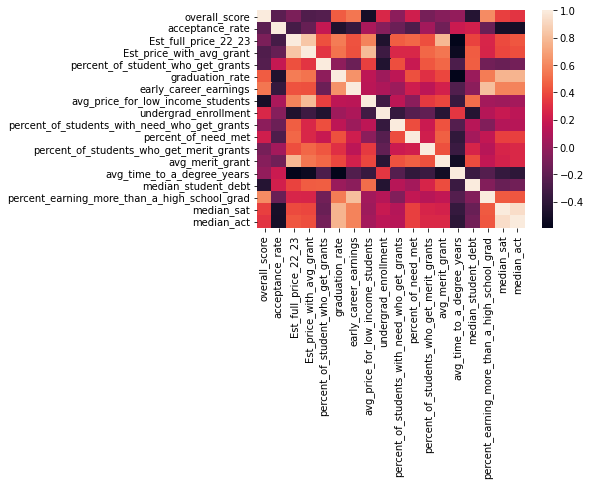

In [ ]:
sns.heatmap(college_df.corr())

In [ ]:
college_df.head()

,college_names,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,...,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,University of Michigan,89.41,23.0,32400.0,18800.0,53.0,92.0,75840.0,2670.0,No,...,92.0,11.0,5670.0,4.2,18526.0,81.0,Ann Arbor,MI,1440.0,33.0
1,University of North Carolina at Chapel Hill,86.22,23.0,25200.0,10600.0,53.0,89.0,61920.0,3750.0,No,...,100.0,5.0,7030.0,4.1,14500.0,78.0,Chapel Hill,NC,1410.0,31.0
2,University of Virginia,86.11,24.0,36700.0,20100.0,48.0,94.0,77050.0,12480.0,No,...,100.0,4.0,5630.0,4.1,18250.0,84.0,Charlottesville,VA,1430.0,32.0
3,Massachusetts Maritime Academy,86.07,91.0,31600.0,18600.0,43.0,73.0,91670.0,6380.0,No,...,71.0,11.0,5530.0,4.2,26000.0,91.0,Buzzards Bay,MA,1100.0,22.0
4,Virginia Military Institute,85.14,60.0,33300.0,20000.0,85.0,78.0,71910.0,10560.0,No,...,88.0,14.0,13100.0,4.1,21500.0,85.0,Lexington,VA,1180.0,25.0


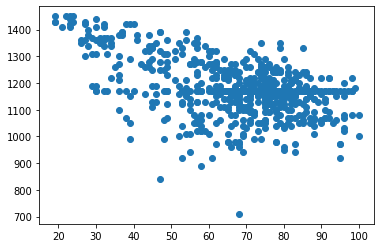

In [ ]:
plt.scatter(college_df['acceptance_rate'], college_df['median_sat'])

In [ ]:
df_float = college_df.select_dtypes('float').copy()

In [ ]:
acceptance = df_float['acceptance_rate'].copy()

In [ ]:
df_float.drop(['acceptance_rate'], axis = 1, inplace = True)

In [ ]:
df_float.shape

(623, 17)

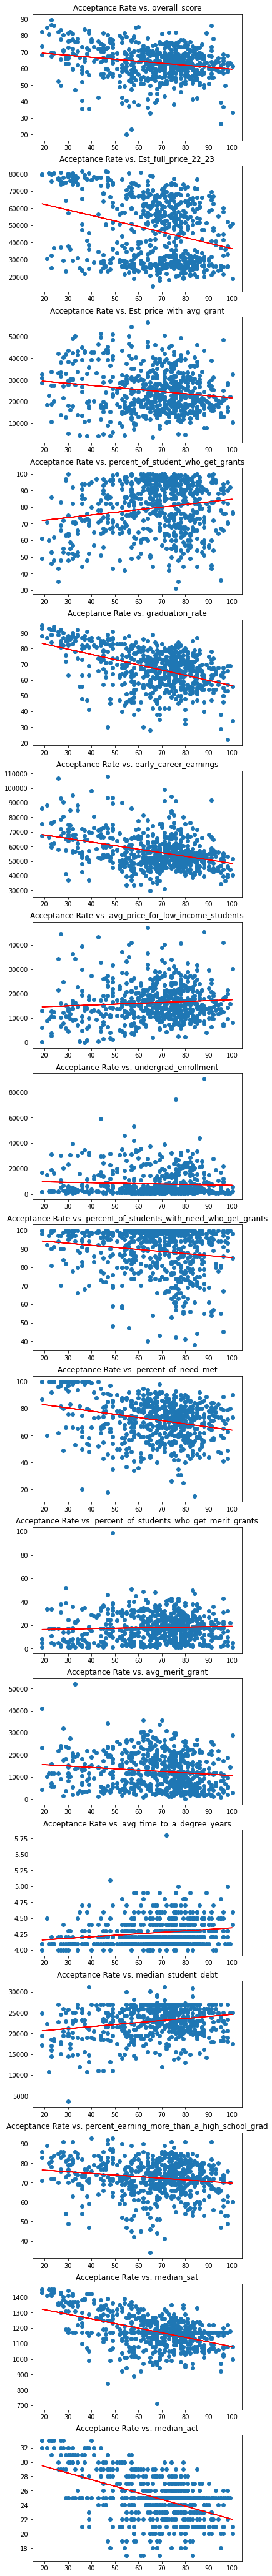

In [ ]:
figure, axis = plt.subplots(17)
figure.set_figheight(75)
cols = df_float.columns.tolist()
for i in range(0, 17):
    axis[i].scatter(acceptance, df_float[cols[i]])
    axis[i].set_title(f"Acceptance Rate vs. {cols[i]}")
    m, b = np.polyfit(acceptance, df_float[cols[i]], 1)
    axis[i].plot(acceptance, m*acceptance + b, color='red')

In [ ]:
college_df.State = college_df.State.str.strip()

In [ ]:
# sum(college_df.State == "CT")
states = college_df.State.unique()
len(states)

49

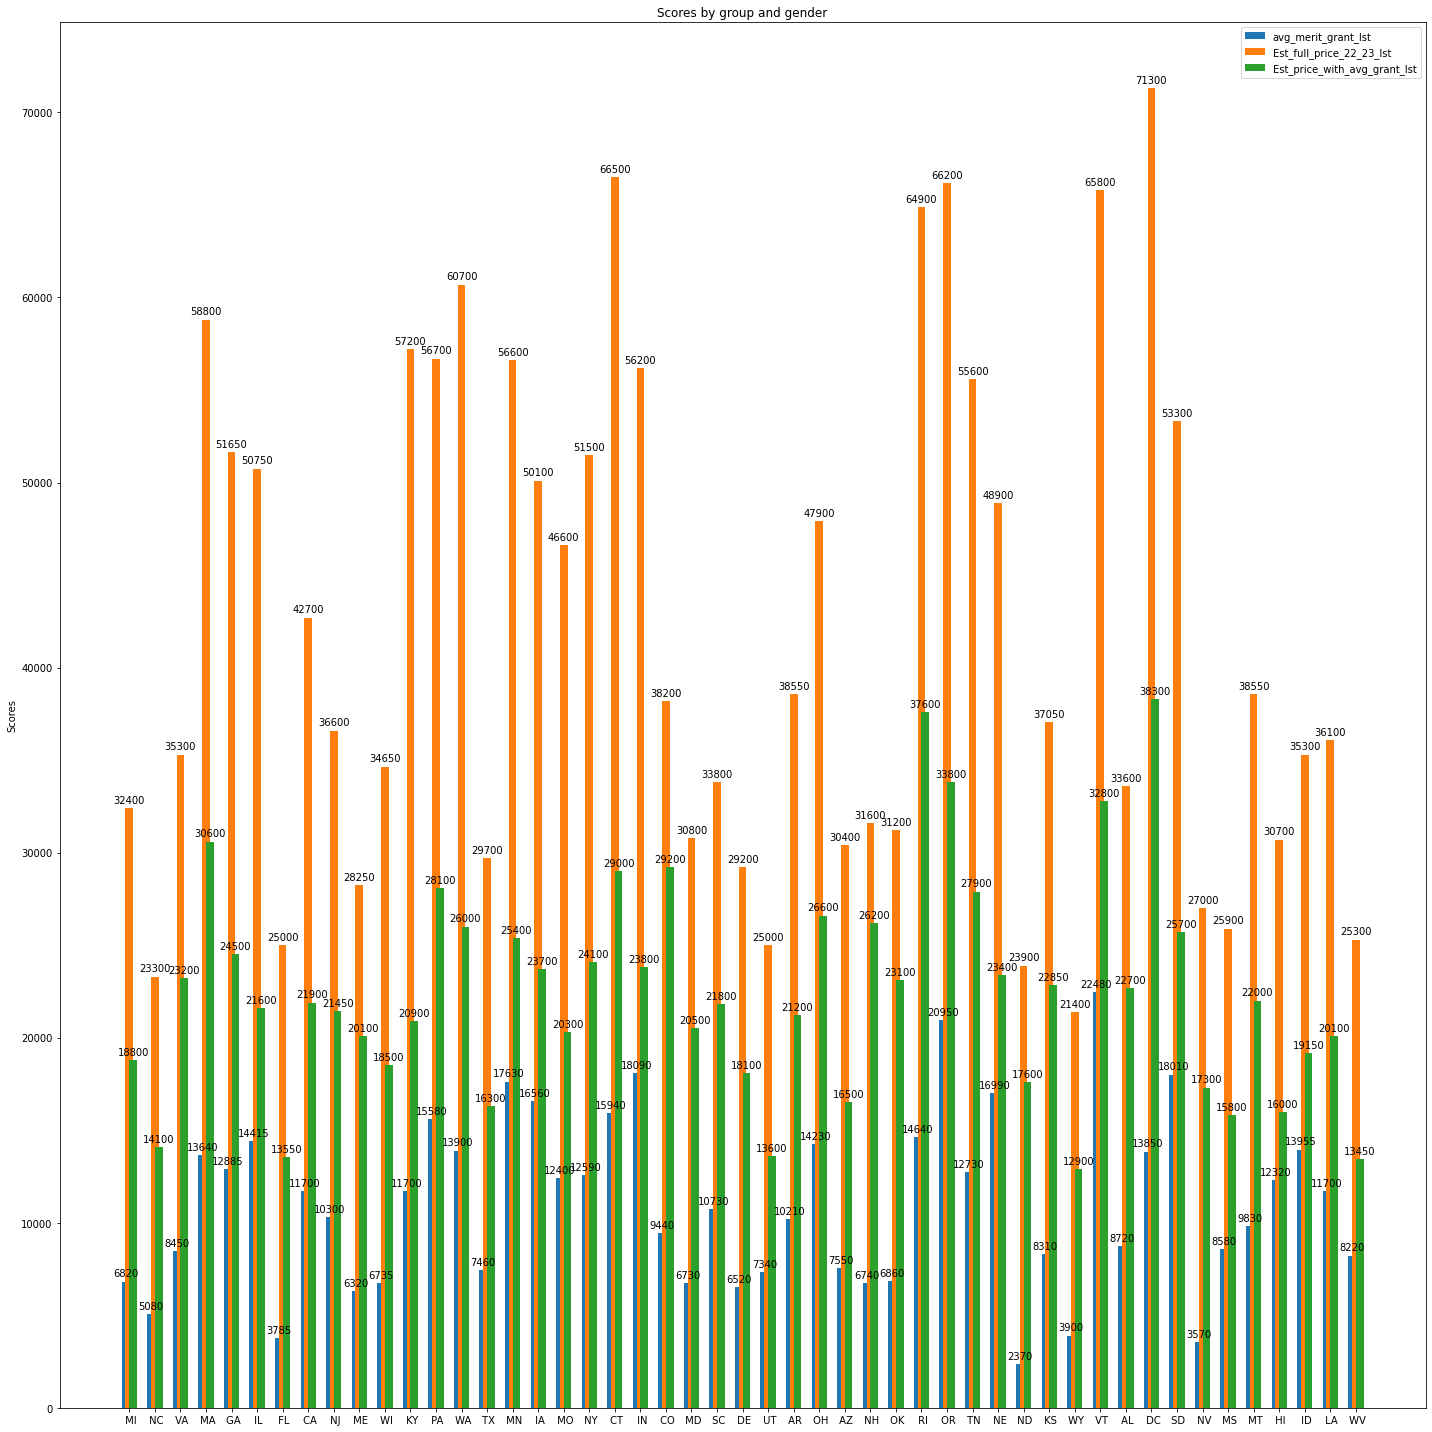

In [ ]:
avg_merit_grant_lst = []
Est_price_with_avg_grant_lst = []
Est_full_price_22_23_lst = []
for state in states:
    avg_merit_grant_lst.append(college_df[college_df.State == state]['avg_merit_grant'].median())
    Est_price_with_avg_grant_lst.append(college_df[college_df.State == state]['Est_price_with_avg_grant'].median())
    Est_full_price_22_23_lst.append(college_df[college_df.State == state]['Est_full_price_22_23'].median())


x = np.arange(len(states))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 20))
rects1 = ax.bar(x - width/2, avg_merit_grant_lst, width, label='avg_merit_grant_lst')
rects2 = ax.bar(x, Est_full_price_22_23_lst, width, label='Est_full_price_22_23_lst')
rects3 = ax.bar(x + width/2, Est_price_with_avg_grant_lst, width, label='Est_price_with_avg_grant_lst')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, states)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
spacing = 0.75
fig.subplots_adjust(bottom=spacing)
fig.tight_layout()
plt.show()

# Data Modelling

In [ ]:
df_preprocess = college_df.copy()

In [ ]:
df_preprocess.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_preprocess.head()

,college_names,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,University of Michigan,89.41,23.0,32400.0,18800.0,53.0,92.0,75840.0,2670.0,No,31050.0,81.0,92.0,11.0,5670.0,4.2,18526.0,81.0,Ann Arbor,MI,1440.0,33.0
1,University of North Carolina at Chapel Hill,86.22,23.0,25200.0,10600.0,53.0,89.0,61920.0,3750.0,No,19010.0,90.0,100.0,5.0,7030.0,4.1,14500.0,78.0,Chapel Hill,NC,1410.0,31.0
2,University of Virginia,86.11,24.0,36700.0,20100.0,48.0,94.0,77050.0,12480.0,No,16720.0,91.0,100.0,4.0,5630.0,4.1,18250.0,84.0,Charlottesville,VA,1430.0,32.0
3,Massachusetts Maritime Academy,86.07,91.0,31600.0,18600.0,43.0,73.0,91670.0,6380.0,No,1650.0,56.0,71.0,11.0,5530.0,4.2,26000.0,91.0,Buzzards Bay,MA,1100.0,22.0
4,Virginia Military Institute,85.14,60.0,33300.0,20000.0,85.0,78.0,71910.0,10560.0,No,1700.0,77.0,88.0,14.0,13100.0,4.1,21500.0,85.0,Lexington,VA,1180.0,25.0


In [ ]:
df_preprocess_sub = df_preprocess.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20]]

In [ ]:
df_preprocess_sub.head()

,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,State,median_sat
0,89.41,23.0,32400.0,18800.0,53.0,92.0,75840.0,2670.0,No,31050.0,81.0,92.0,11.0,5670.0,4.2,18526.0,81.0,MI,1440.0
1,86.22,23.0,25200.0,10600.0,53.0,89.0,61920.0,3750.0,No,19010.0,90.0,100.0,5.0,7030.0,4.1,14500.0,78.0,NC,1410.0
2,86.11,24.0,36700.0,20100.0,48.0,94.0,77050.0,12480.0,No,16720.0,91.0,100.0,4.0,5630.0,4.1,18250.0,84.0,VA,1430.0
3,86.07,91.0,31600.0,18600.0,43.0,73.0,91670.0,6380.0,No,1650.0,56.0,71.0,11.0,5530.0,4.2,26000.0,91.0,MA,1100.0
4,85.14,60.0,33300.0,20000.0,85.0,78.0,71910.0,10560.0,No,1700.0,77.0,88.0,14.0,13100.0,4.1,21500.0,85.0,VA,1180.0


In [ ]:
X = df_preprocess_sub.iloc[:, [0] + list(range(2, df_preprocess_sub.shape[1]))]

In [ ]:
y = df_preprocess_sub['acceptance_rate']

In [ ]:
X.head()

,overall_score,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,State,median_sat
0,89.41,32400.0,18800.0,53.0,92.0,75840.0,2670.0,No,31050.0,81.0,92.0,11.0,5670.0,4.2,18526.0,81.0,MI,1440.0
1,86.22,25200.0,10600.0,53.0,89.0,61920.0,3750.0,No,19010.0,90.0,100.0,5.0,7030.0,4.1,14500.0,78.0,NC,1410.0
2,86.11,36700.0,20100.0,48.0,94.0,77050.0,12480.0,No,16720.0,91.0,100.0,4.0,5630.0,4.1,18250.0,84.0,VA,1430.0
3,86.07,31600.0,18600.0,43.0,73.0,91670.0,6380.0,No,1650.0,56.0,71.0,11.0,5530.0,4.2,26000.0,91.0,MA,1100.0
4,85.14,33300.0,20000.0,85.0,78.0,71910.0,10560.0,No,1700.0,77.0,88.0,14.0,13100.0,4.1,21500.0,85.0,VA,1180.0


In [ ]:
cols = X.columns.tolist()
cols.remove('sat_act_required')
cols.remove('State')

In [ ]:
X[cols].join(pd.get_dummies(X[['sat_act_required', 'State']]))

,Est_full_price_22_23,Est_price_with_avg_grant,avg_merit_grant,avg_price_for_low_income_students,avg_time_to_a_degree_years,early_career_earnings,graduation_rate,median_sat,median_student_debt,overall_score,percent_earning_more_than_a_high_school_grad,percent_of_need_met,percent_of_student_who_get_grants,percent_of_students_who_get_merit_grants,percent_of_students_with_need_who_get_grants,undergrad_enrollment,sat_act_required_No,sat_act_required_Yes,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ HI,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ MA,State_ MD,State_ ME,State_ MI,State_ MN,State_ MO,State_ MS,State_ MT,State_ NC,State_ ND,State_ NE,State_ NH,State_ NJ,State_ NV,State_ NY,State_ OH,State_ OK,State_ OR,State_ PA,State_ RI,State_ SC,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,32400.0,18800.0,5670.0,2670.0,4.2,75840.0,92.0,1440.0,18526.0,89.41,81.0,92.0,53.0,11.0,81.0,31050.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25200.0,10600.0,7030.0,3750.0,4.1,61920.0,89.0,1410.0,14500.0,86.22,78.0,100.0,53.0,5.0,90.0,19010.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36700.0,20100.0,5630.0,12480.0,4.1,77050.0,94.0,1430.0,18250.0,86.11,84.0,100.0,48.0,4.0,91.0,16720.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,31600.0,18600.0,5530.0,6380.0,4.2,91670.0,73.0,1100.0,26000.0,86.07,91.0,71.0,43.0,11.0,56.0,1650.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33300.0,20000.0,13100.0,10560.0,4.1,71910.0,78.0,1180.0,21500.0,85.14,85.0,88.0,85.0,14.0,77.0,1700.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,51100.0,32600.0,28810.0,30050.0,4.4,51480.0,56.0,1080.0,25000.0,33.31,60.0,73.5,76.0,1.0,98.0,2240.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
619,38400.0,28900.0,11700.0,26050.0,4.6,37920.0,49.0,980.0,27000.0,33.21,46.0,77.0,86.0,17.0,98.0,1440.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
620,25800.0,13100.0,11700.0,13760.0,4.5,34580.0,29.0,970.0,23894.0,26.79,47.0,73.5,36.0,17.0,94.0,1640.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
621,74500.0,54500.0,11700.0,40790.0,4.4,39470.0,63.0,1240.0,27000.0,23.31,51.0,73.5,89.0,17.0,94.0,2980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

In [ ]:
X_stand.head()

,overall_score,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,median_sat
0,2.672295,-0.778059,-0.610834,-1.704469,1.945156,1.659521,-1.808047,2.221340,-0.622031,1.317189,-0.613817,-0.875366,-0.340142,-1.201603,0.946598,2.467436
1,2.342814,-1.160943,-1.441774,-1.704469,1.708716,0.470478,-1.664862,1.053717,0.090186,1.835557,-1.140550,-0.704963,-0.819573,-2.287433,0.613668,2.185051
2,2.331453,-0.549392,-0.479100,-2.025999,2.102782,1.762879,-0.507449,0.831636,0.169321,1.835557,-1.228338,-0.880378,-0.819573,-1.276041,1.279529,2.373308
3,2.327322,-0.820602,-0.631101,-2.347529,0.447705,3.011715,-1.316180,-0.629832,-2.600412,-0.043527,-0.613817,-0.892908,-0.340142,0.814169,2.056367,-0.732933
4,2.231266,-0.730199,-0.489234,0.353321,0.841771,1.323821,-0.762000,-0.624983,-0.938572,1.058005,-0.350451,0.055587,-0.819573,-0.399502,1.390506,0.020095


In [ ]:
X = X_stand.join(pd.get_dummies(X[['sat_act_required', 'State']]))

In [ ]:
X.head()

,overall_score,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,median_sat,sat_act_required_No,sat_act_required_Yes,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ HI,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ MA,State_ MD,State_ ME,State_ MI,State_ MN,State_ MO,State_ MS,State_ MT,State_ NC,State_ ND,State_ NE,State_ NH,State_ NJ,State_ NV,State_ NY,State_ OH,State_ OK,State_ OR,State_ PA,State_ RI,State_ SC,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,2.672295,-0.778059,-0.610834,-1.704469,1.945156,1.659521,-1.808047,2.221340,-0.622031,1.317189,-0.613817,-0.875366,-0.340142,-1.201603,0.946598,2.467436,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.342814,-1.160943,-1.441774,-1.704469,1.708716,0.470478,-1.664862,1.053717,0.090186,1.835557,-1.140550,-0.704963,-0.819573,-2.287433,0.613668,2.185051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.331453,-0.549392,-0.479100,-2.025999,2.102782,1.762879,-0.507449,0.831636,0.169321,1.835557,-1.228338,-0.880378,-0.819573,-1.276041,1.279529,2.373308,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2.327322,-0.820602,-0.631101,-2.347529,0.447705,3.011715,-1.316180,-0.629832,-2.600412,-0.043527,-0.613817,-0.892908,-0.340142,0.814169,2.056367,-0.732933,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.231266,-0.730199,-0.489234,0.353321,0.841771,1.323821,-0.762000,-0.624983,-0.938572,1.058005,-0.350451,0.055587,-0.819573,-0.399502,1.390506,0.020095,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:16], y)
y_pred = model.predict(X.iloc[:, 0:16])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 171.15270965253197


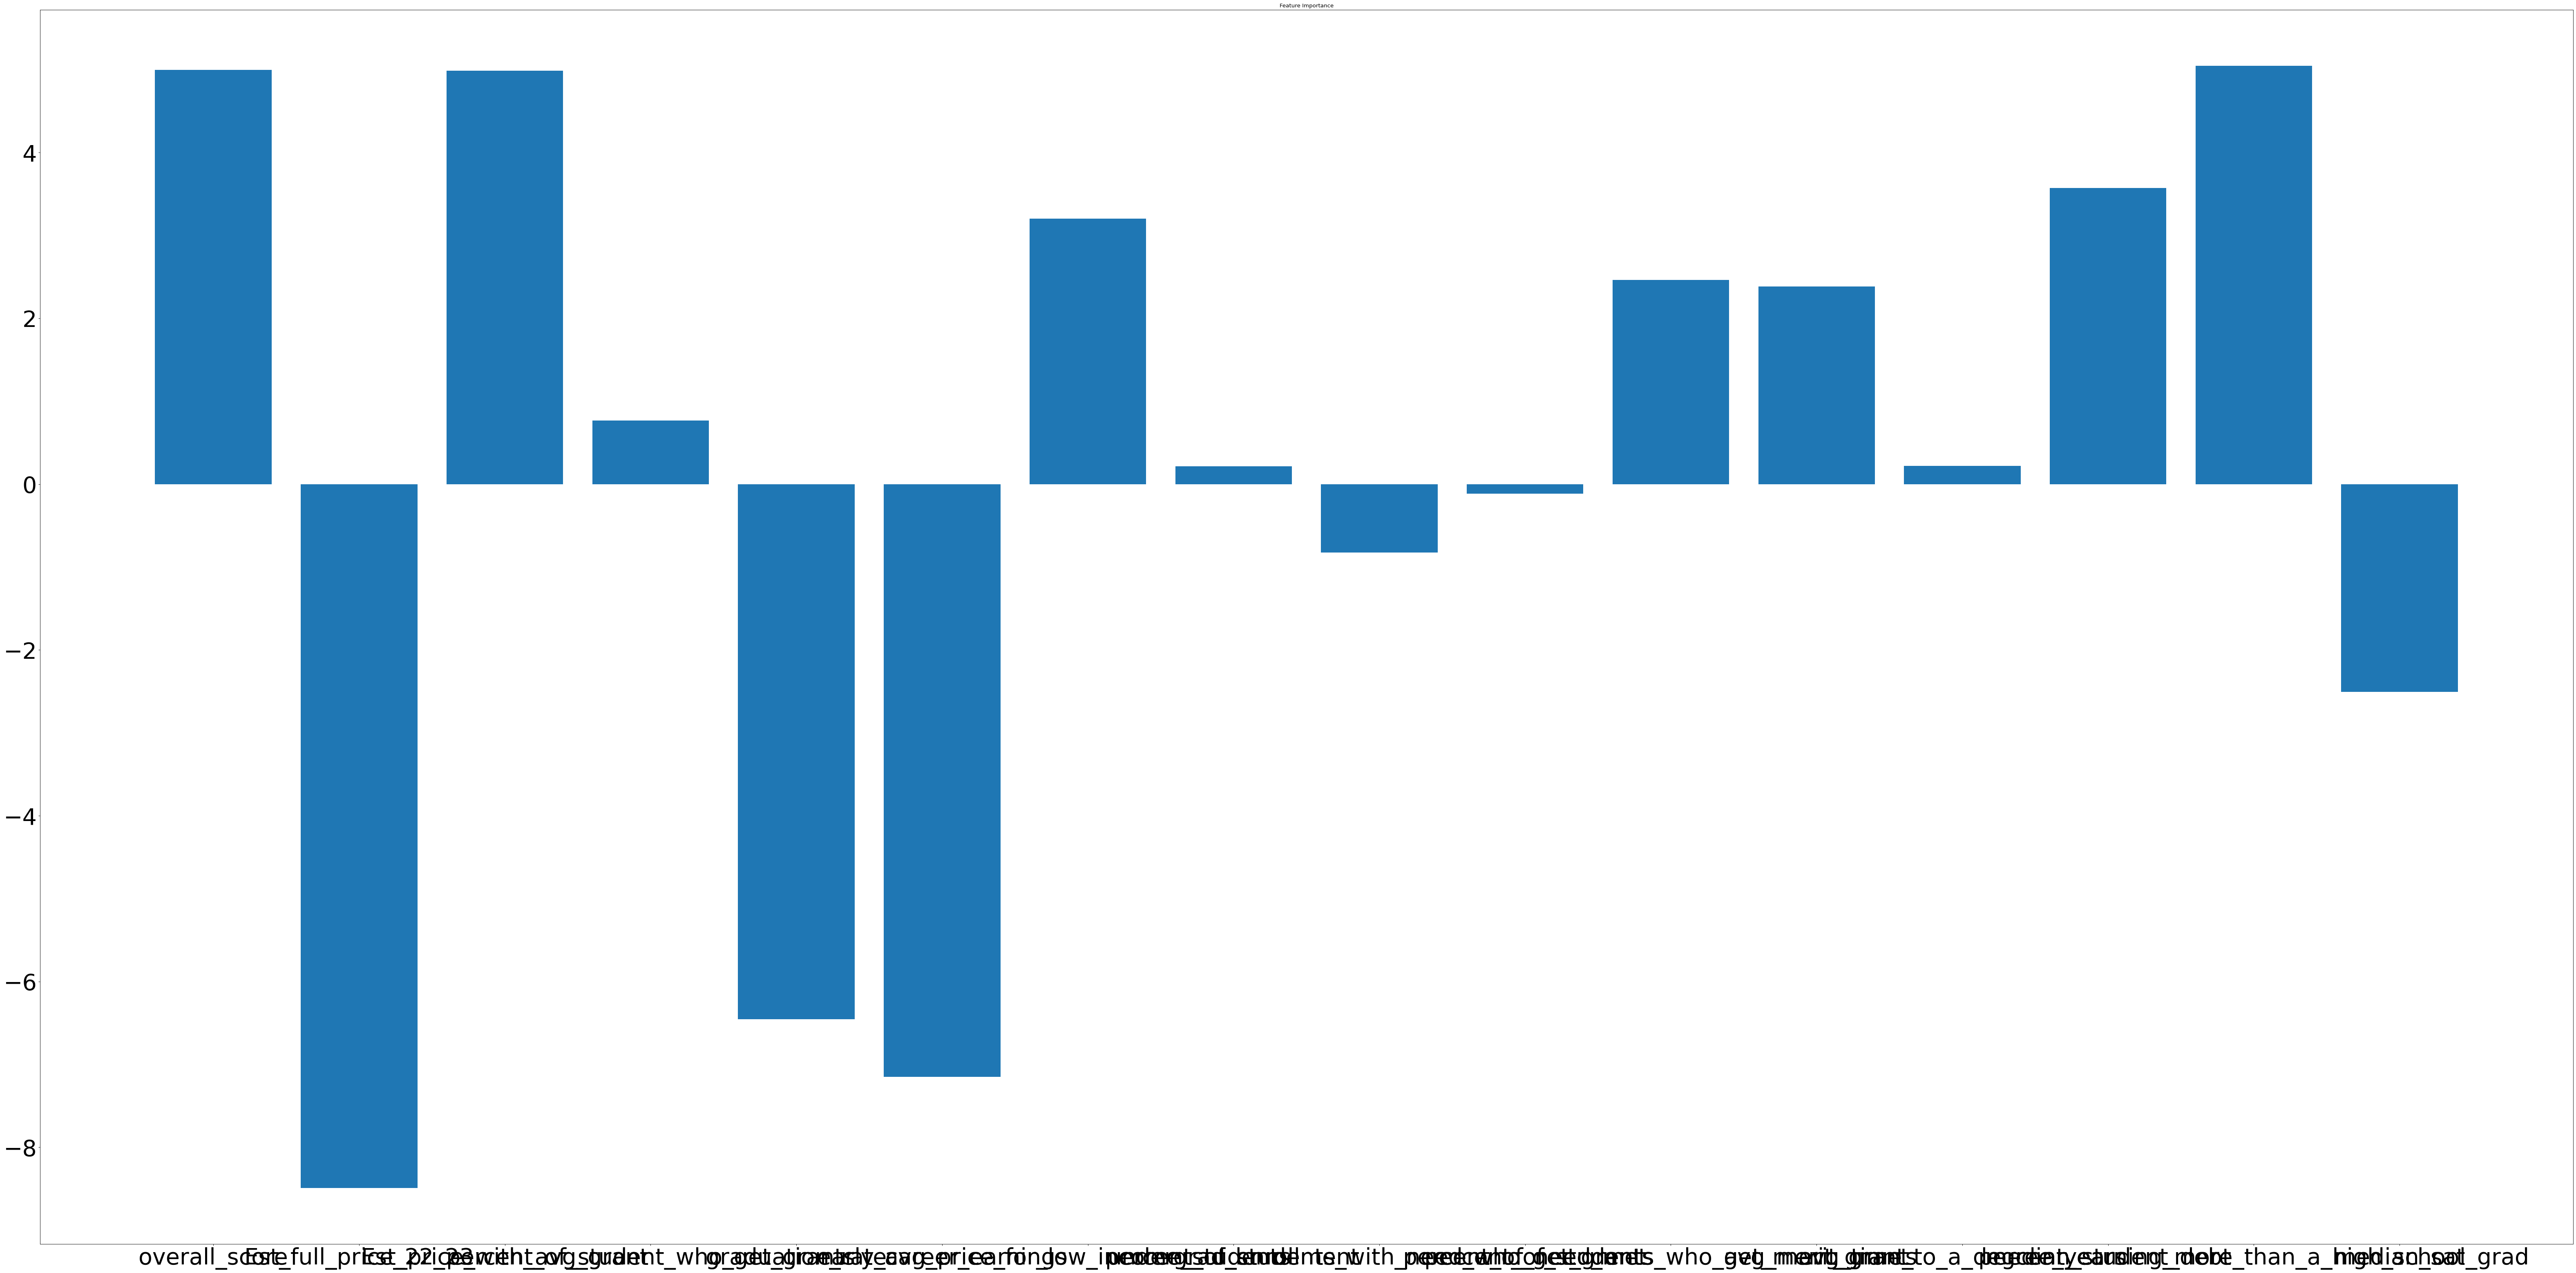

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance = model.coef_
feature_names = X.iloc[:, 0:16].columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [ ]:
temp = {"feature":cols, "feature_importance":feature_importance.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,overall_score,5.600956
1,Est_full_price_22_23,-6.144739
2,Est_price_with_avg_grant,1.647018
3,percent_of_student_who_get_grants,1.244277
4,graduation_rate,-5.281482
5,early_career_earnings,-5.590690
6,avg_price_for_low_income_students,3.785783
7,undergrad_enrollment,0.136247
8,percent_of_students_with_need_who_get_grants,-1.152637
9,percent_of_need_met,-1.960996


In [ ]:
# from sklearn import svm
# regr = svm.SVR(kernel='linear')
# regr.fit(X.iloc[:, 0:16], y)
# y_pred = regr.predict(X.iloc[:, 0:16])

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:16], y)
y_pred = regressor.predict(X.iloc[:, 0:16])

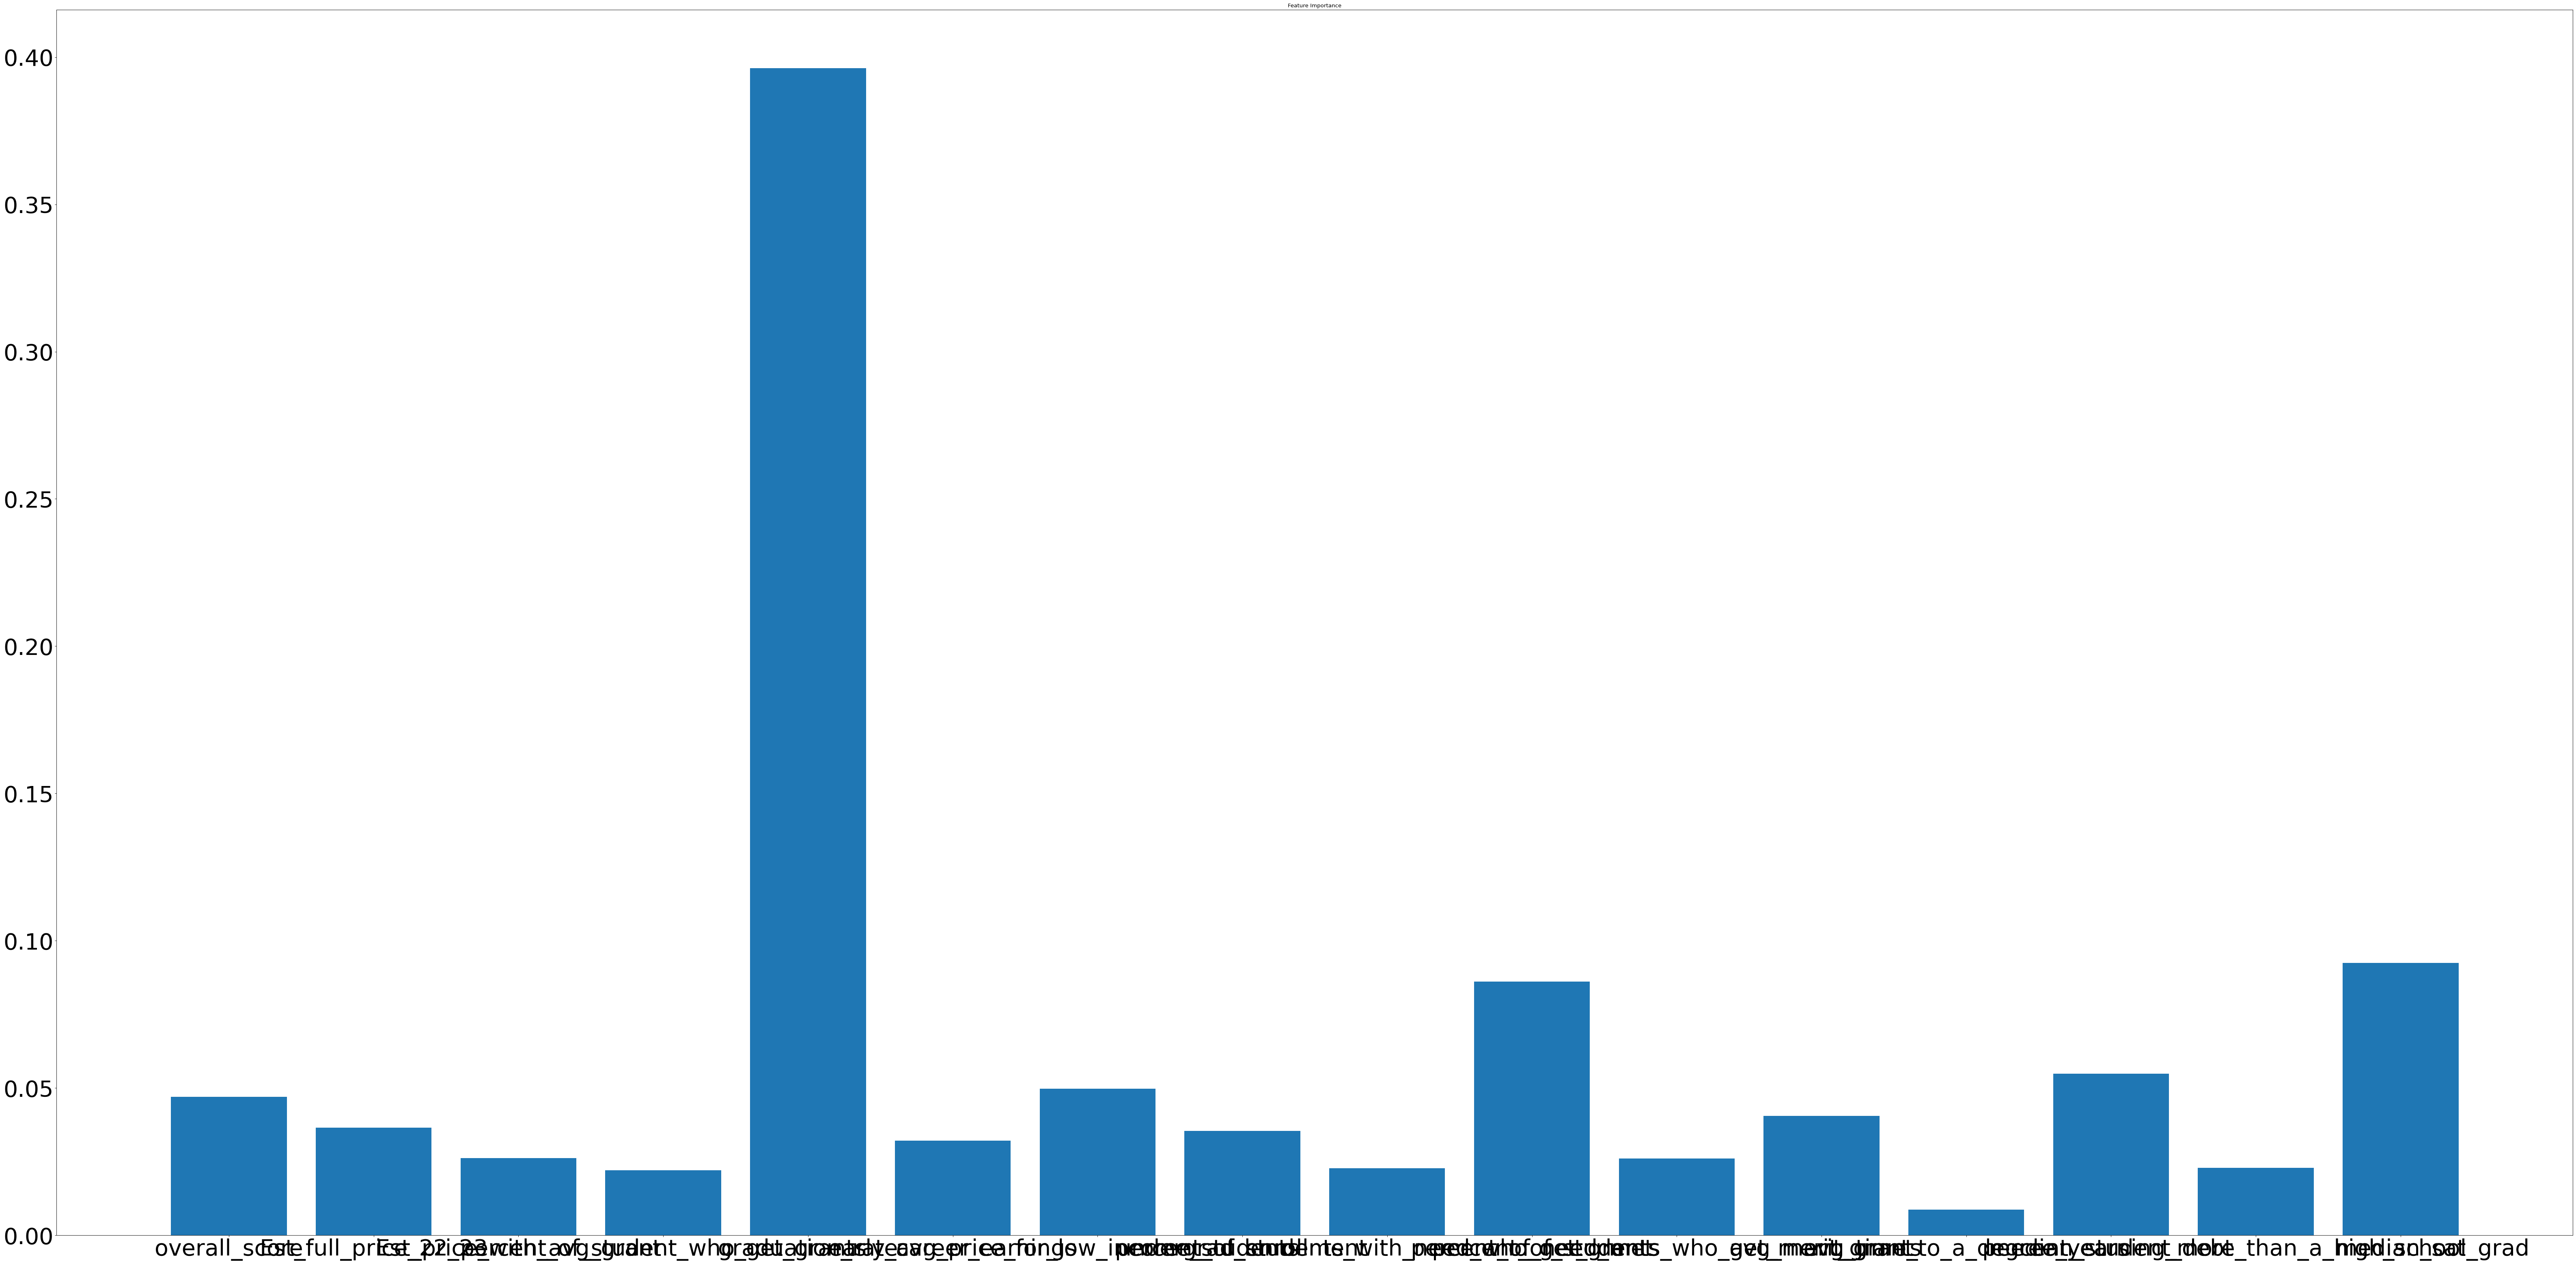

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:16].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [ ]:
temp = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,overall_score,0.047021
1,Est_full_price_22_23,0.036512
2,Est_price_with_avg_grant,0.026244
3,percent_of_student_who_get_grants,0.022064
4,graduation_rate,0.396223
5,early_career_earnings,0.032149
6,avg_price_for_low_income_students,0.049745
7,undergrad_enrollment,0.035482
8,percent_of_students_with_need_who_get_grants,0.022799
9,percent_of_need_met,0.086179
